# Microsoft stock price analysis
## General analysis and visualization

In this notebook we clean and visualize Microsoft stock prices as an example for a financial time series. We want to prepare the data for time series predictions usind ARIMA and LSTM.

The data is from 
https://www.nasdaq.com/market-activity/stocks/msft/historical



## Importing moduls

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the data

In [2]:
msft_stock_df = pd.read_csv('data/msft_stock_price.csv')

## First entries

In [3]:
print(msft_stock_df.shape)
msft_stock_df.head()

(2517, 6)


,Date,Close/Last,Volume,Open,High,Low
0,07/13/2020,$207.07,38135610,$214.48,$215.8,$206.5
1,07/10/2020,$213.67,26177630,$213.62,$214.08,$211.08
2,07/09/2020,$214.32,33121680,$216.33,$216.38,$211.47
3,07/08/2020,$212.83,33600030,$210.07,$213.26,$208.69
4,07/07/2020,$208.25,33600730,$210.45,$214.67,$207.99


## Info's and data types

In [4]:
msft_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
Date           2517 non-null object
 Close/Last    2517 non-null object
 Volume        2517 non-null int64
 Open          2517 non-null object
 High          2517 non-null object
 Low           2517 non-null object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


No missing data, but not usable datatypes

## Cleaning

In [7]:
# format the column names
msft_stock_df.columns = [x.lower().strip(' ').replace('/last', '') for x in msft_stock_df.columns]

# convert to datetime
msft_stock_df['date'] = pd.to_datetime(msft_stock_df['date'])

# convert rest to numeric
for col in msft_stock_df.columns[1:]:
    msft_stock_df[col] = [pd.to_numeric(str(x).replace(' $', '')) for x in msft_stock_df[col]]

# change it to timely increasing
msft_stock_df = msft_stock_df.sort_values('date', ascending = True)
msft_stock_df = msft_stock_df.reset_index(drop = True)

# Showing the recent observations in the cleaned dataframe

In [8]:
msft_stock_df.tail()

,date,close,volume,open,high,low
2512,2020-07-07,208.25,33600730,210.45,214.67,207.99
2513,2020-07-08,212.83,33600030,210.07,213.26,208.69
2514,2020-07-09,214.32,33121680,216.33,216.38,211.47
2515,2020-07-10,213.67,26177630,213.62,214.08,211.08
2516,2020-07-13,207.07,38135610,214.48,215.80,206.50


## Description

In [9]:
msft_stock_df.describe().T

,count,mean,std,min,25%,50%,75%,max
close,2517.0,6.407449e+01,4.252234e+01,23.465,30.78,47.13,88.00,2.143200e+02
volume,2517.0,3.856333e+07,2.136248e+07,7425603.000,24079770.00,33238000.00,48278130.00,2.697649e+08
open,2517.0,6.404986e+01,4.251093e+01,23.600,30.82,47.02,87.85,2.163300e+02
high,2517.0,6.463673e+01,4.298266e+01,23.730,31.05,47.54,88.58,2.163800e+02
low,2517.0,6.343713e+01,4.200039e+01,23.320,30.52,46.62,87.08,2.114700e+02


C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


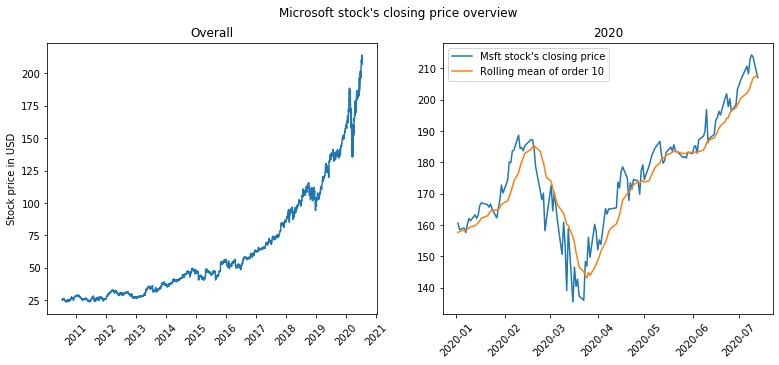

In [10]:
# for formatting of date indexed axis
import matplotlib.dates as mdates

current_bool = (msft_stock_df.date > pd.to_datetime('2020/01/01'))

plt.figure(figsize = (13,5))
plt.suptitle('Microsoft stock\'s closing price overview')

plt.subplot(1,2,1)
plt.plot('date', 'close',data = msft_stock_df)
plt.ylabel('Stock price in USD')
plt.xticks(rotation = '45')
plt.title('Overall')

ax = plt.subplot(1,2,2)
ax.plot('date', 'close', data = msft_stock_df[current_bool],
        label = 'Msft stock\'s closing price')
ax.plot(msft_stock_df['date'][current_bool],
         msft_stock_df['close'].rolling(10).mean()[current_bool],
        label = 'Rolling mean of order 10')
ax.legend()
ax.set_title('2020')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.format_xdata = mdates.DateFormatter('%b')
plt.xticks(rotation = '45')

plt.show()

[]

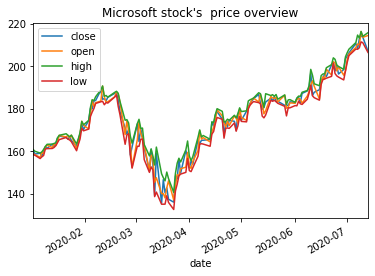

In [11]:
msft_stock_df[current_bool].set_index('date').drop('volume', axis = 1).plot()
plt.title('Microsoft stock\'s  price overview')
plt.plot()

In [12]:
msft_stock_df.to_csv("data\msft_stock_price_cleaned.csv")